In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
XMAX = .01

In [3]:
def find_redshift_diffs(file_name):
    """
    Stuff
    """
    opened = False
    plus1 = []
    plus2 = []
    lines = []
    try:
        f = open(file_name)
        opened = True
        first = f.readline().split()
        z_i = first.index('Z')
        plate_i = first.index('PLATE')
        fiber_i = first.index('FIBER')
    except:
        print('FAILED')
    else:
        for line in f:
            lines.append(line.split())
        for i in range(len(lines)-1):
            if lines[i][plate_i] == lines[i+1][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-1:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus1.append(diff)
                elif int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus2.append(diff)
        for i in range(len(lines)-2):
            if lines[i][plate_i] == lines[i+2][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+2][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+2][z_i])
                    plus2.append(diff)
    finally:
        if opened:
            f.close()
    plus1 = np.array(plus1)
    plus2 = np.array(plus2)
    return plus1, plus2

In [5]:
info0_1, info0_2 = find_redshift_diffs('mjd0.dat')

<function matplotlib.pyplot.show>

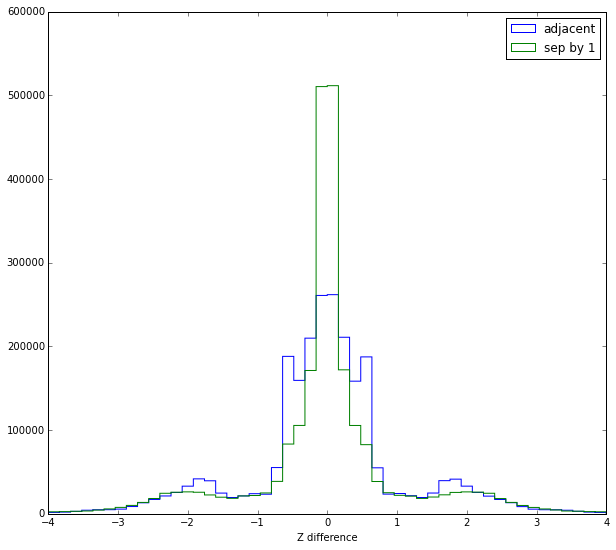

In [18]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = np.linspace(-4,4,51), label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = np.linspace(-4,4,51), label = 'sep by 1')
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z_all.png')
plt.show

<function matplotlib.pyplot.show>

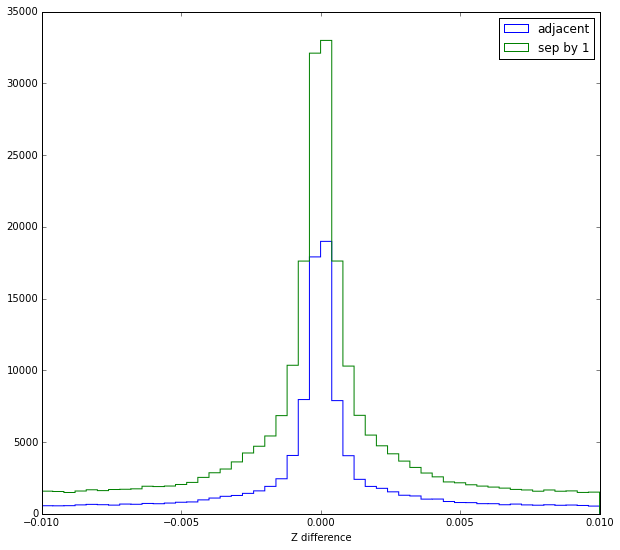

In [31]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z_all_close.png')
plt.show

In [6]:
info1_1, info1_2 = find_redshift_diffs('mjd1.dat')

<function matplotlib.pyplot.show>

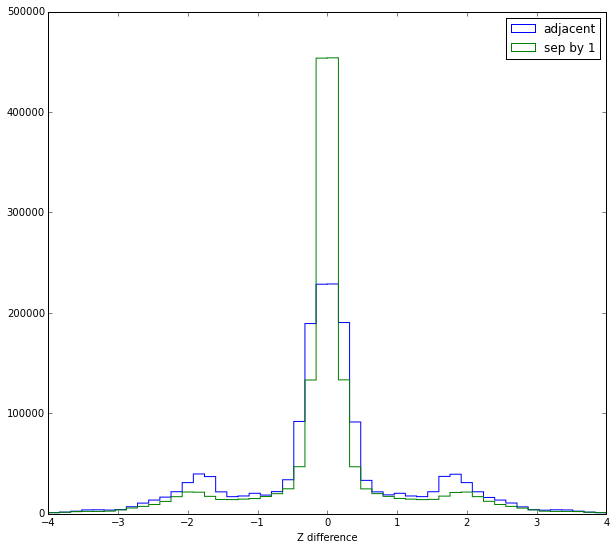

In [35]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = np.linspace(-4,4,51), label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = np.linspace(-4,4,51), label = 'sep by 1')
plt.xlim(-4,4)
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z>0.1.png')
plt.show

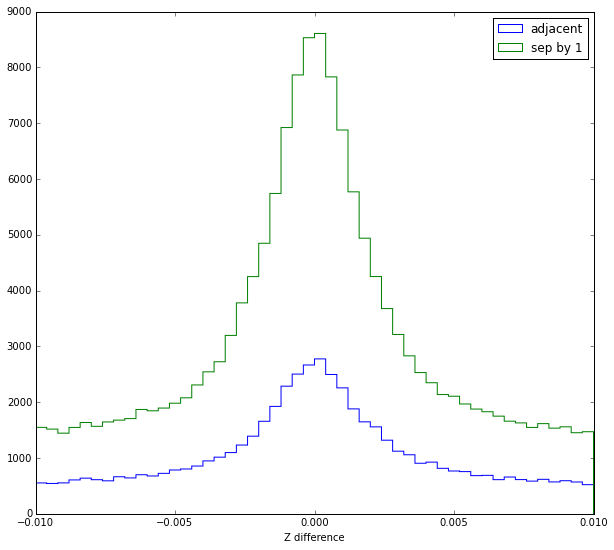

In [32]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z>0.1_close.png')
plt.show()

In [7]:
info5_1, info5_2 = find_redshift_diffs('mjd5.dat')

<function matplotlib.pyplot.show>

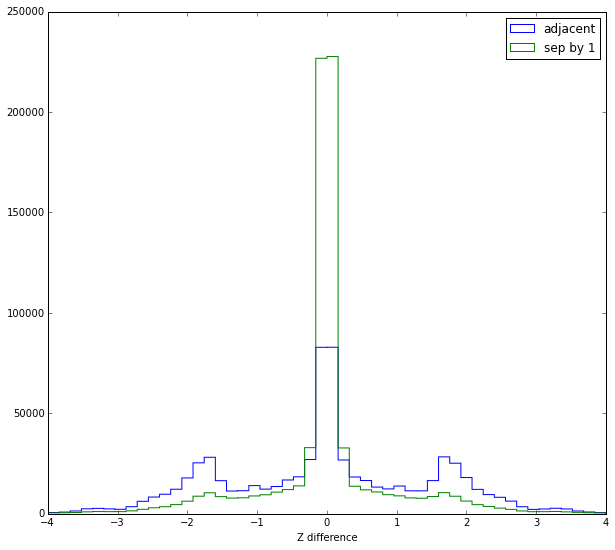

In [36]:
plt.figure(figsize = (10,9))
plt.hist(info5_1, histtype = 'step', bins = np.linspace(-4,4,51), label = 'adjacent')
plt.hist(info5_2, histtype = 'step', bins = np.linspace(-4,4,51), label = 'sep by 1')
plt.xlim(-4,4)
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z>0.5.png')
plt.show

<function matplotlib.pyplot.show>

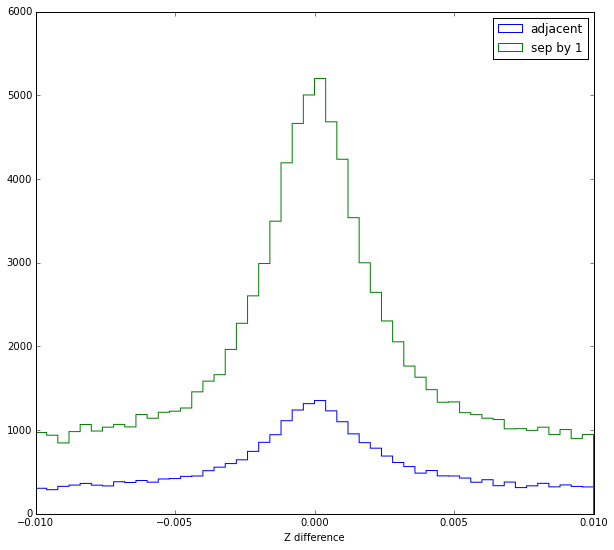

In [33]:
plt.figure(figsize = (10,9))
plt.hist(info5_1, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'adjacent')
plt.hist(info5_2, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference')
plt.legend()
plt.savefig('Z>0.5_close.png')
plt.show

# Monte Carlo

In [4]:
def monte_carlo(file_name):
    """
    Stuff
    """
    opened = False
    lines = []
    try:
        f = open(file_name)
        opened = True
        first = f.readline().split()
        z_i = first.index('Z')
    except:
        print('FAILED')
    else:
        for line in f:
            lines.append(float(line.split()[z_i]))
    finally:
        if opened:
            f.close()
    monte1 = np.random.choice(lines, size = 1000000, replace = False)
    monte2 = np.random.choice(lines, size = 1000000, replace = False)
    return monte1, monte2

In [9]:
a0_1, a0_2 = monte_carlo('mjd0.dat')
a1_1, a1_2 = monte_carlo('mjd1.dat')
a5_1, a5_2 = monte_carlo('mjd5.dat')

<function matplotlib.pyplot.show>

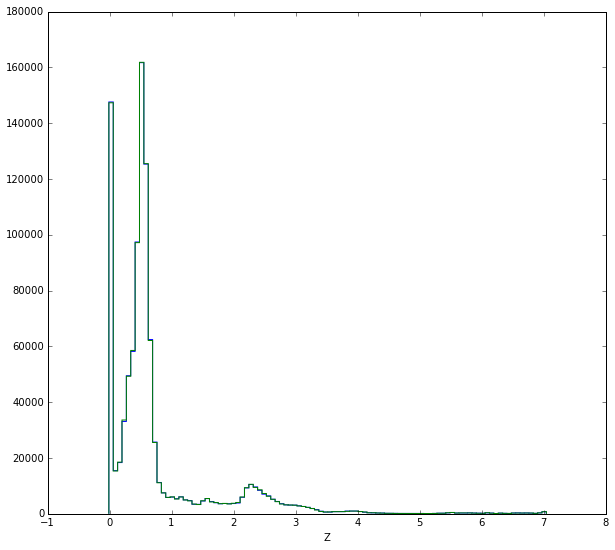

In [10]:
plt.figure(figsize = (10,9))
plt.hist(a0_1, histtype = 'step', bins = 100)
plt.hist(a0_2, histtype = 'step', bins = 100)
plt.xlabel('Z')
#plt.legend()
plt.show

<function matplotlib.pyplot.show>

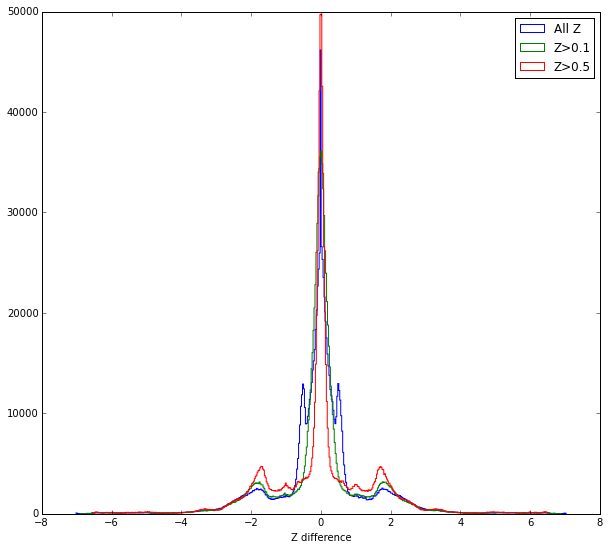

In [13]:
plt.figure(figsize = (10,9))
plt.hist(a0_1-a0_2, histtype = 'step', bins = 500, label = 'All Z')
plt.hist(a1_1-a1_2, histtype = 'step', bins = 500, label = 'Z>0.1')
plt.hist(a5_1-a5_2, histtype = 'step', bins = 500, label = 'Z>0.5')
#plt.xlim(-4,4)
plt.xlabel('Z difference')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

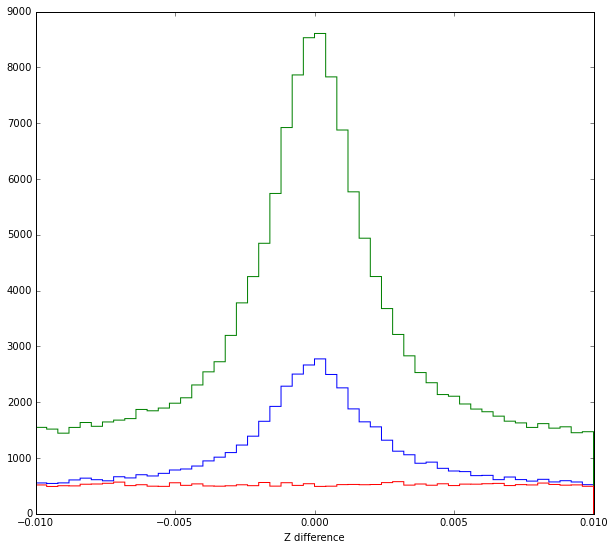

In [15]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'sep by 1')
plt.hist(a1_1-a1_2, histtype = 'step', bins = np.linspace(-XMAX,XMAX,51), label = 'monte')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference')
#plt.legend()
plt.show

Note: The lengths of the arrays being plotted in the previous graph are not the same.